Attempt to make a correlation between the shapley values and the values of a feature. To make visible if the increase of the value of a feature causes an increase or decrease in shapley values. Did not work out as expected.

In [38]:
import numpy as np
from Functions.DataSet import PhenologicalDatasetTransposedMA_minus, PhenologicalDatasetTransposedMA
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm


np.random.seed(42) # 42

dict_names ={
    0: 'RankOneLeafDate',
    1: 'AppearedSpatheDate_compl',
    2: 'OpenedSpatheDate_compl',
    3: 'FloweringDate_compl',
    4: 'HarvestDate_compl',
    5: 'BunchMass',
    6: 'AbortedInflo',
    7: 'BunchLoad',
    8: 'FemaleInflo',
    9: 'MaleInflo',
    
    10: 'TMin',
    11: 'TMax',
    12: 'TAverage',
    13: 'HRMin',
    14: 'HRMax',
    15: 'HRAverage',
    16: 'WindSpeed',
    17: 'Rainfall',
    18: 'Rg'
}
dict_names_ex ={
    0: 'RankOneLeafDate',
    1: 'AppearedSpatheDate_compl',
    2: 'OpenedSpatheDate_compl',
    3: 'FloweringDate_compl',
    4: 'HarvestDate_compl',
    5: 'BunchMass',
    6: 'AbortedInflo',
    7: 'TMin',
    8: 'TMax',
    9: 'TAverage',
    10: 'HRMin',
    11: 'HRMax',
    12: 'HRAverage',
    13: 'WindSpeed',
    14: 'Rainfall',
    15: 'Rg'
}

dict_names_ex_flowers ={
    0: 'RankOneLeafDate',
    1: 'AppearedSpatheDate_compl',
    2: 'OpenedSpatheDate_compl',
    3: 'FloweringDate_compl',
    4: 'HarvestDate_compl',
    5: 'BunchMass',
    6: 'AbortedInflo',
    7: 'BunchLoad',
    10: 'TMin',
    11: 'TMax',
    12: 'TAverage',
    13: 'HRMin',
    14: 'HRMax',
    15: 'HRAverage',
    16: 'WindSpeed',
    17: 'Rainfall',
    18: 'Rg'
}

In [39]:
#Loqd the random drawn samples from the data
X = PhenologicalDatasetTransposedMA(path='/home/u108-n256/PalmProject/NeuralNetwork_Testing/NN_Inputs', train=False, flower='male').data

#draw random samples from the data
random_ids = np.random.choice(X.shape[0], 100, replace=False)

X_shapley =X[random_ids,:,:].reshape(100, -1)
print(X_shapley.shape)

(54, 126, 1) (6804, 40, 190)
(100, 7600)


In [40]:
shapley_values = np.load('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/Shapley-Values/202406_SHAP_values_Male_CNN_alldata.npy', allow_pickle=True)

print(shapley_values.shape)

(100, 7600)


In [41]:
def get_correlation_coeff(X, shapley_values):
    corrs = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        corr = np.corrcoef(X[:,i], shapley_values[:,i])[0,1]
        corrs[i] = corr
    return corrs

/home/u108-n256/miniconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/u108-n256/miniconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


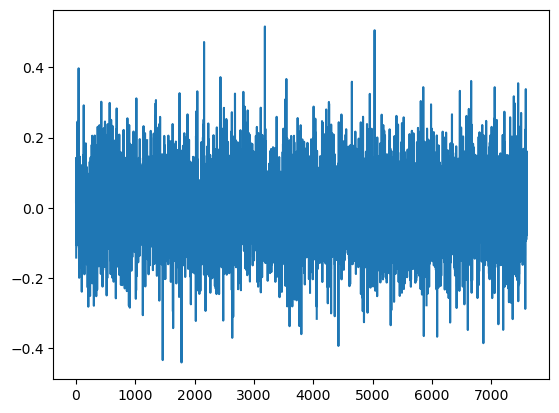

In [42]:
correlation_coeff = get_correlation_coeff(X_shapley, shapley_values)

plt.plot(correlation_coeff)
plt.show()

In [43]:
def avg_shap_feature(shap_values):
    '''

    return:
    all_features_shaps: list of list of shap values for each feature
    abs_sum_feature_shaps: sum of absolute shap values for each feature (total strength of the feature)
    sum_feature_shaps: sum of shap values for each feature (total contribution of the feature)
    abs_avg_feature_shaps: average of absolute shap values for each feature (average strength of a feature per data point)
    avg_feature_shaps: average of shap values for each feature (average contribution of a feature per data point)
    '''
    all_features_shaps = []

    #reshape shap values to be able to iterate over samples, 20 day periods and features
    try:
        shap_values = shap_values.reshape(-1, 40, 190)
        n_pheno_features = 10
    except:
        shap_values = shap_values.reshape(-1, 40, 187)
        n_pheno_features = 7

    #initialize list of list of shap values for each feature
    for i in range(9+n_pheno_features):
        all_features_shaps.append([])

    for sample in range(shap_values.shape[0]):

        for tweenty_day_period in range(shap_values.shape[1]):

            for pheno_features in range(0,n_pheno_features):
                all_features_shaps[pheno_features].append(shap_values[sample, tweenty_day_period, pheno_features])
            
            for days in range(20):

                for weather_features in range(0,9):
                    # since days starts with 0 and weather_features with 10, we need to multiply days by 10 to get the correct index
                    all_features_shaps[weather_features+n_pheno_features].append(shap_values[sample, tweenty_day_period, n_pheno_features + weather_features + days*9])
    
    for i, data in enumerate(all_features_shaps):
        
        all_features_shaps[i] = np.array(data)

    return all_features_shaps

all_features_shaps = avg_shap_feature(shapley_values)

In [44]:
all_features_shaps = avg_shap_feature(shapley_values)

In [45]:
def correlation_coeff_per_feature(correlation_coeff):
    all_features_correlation_coeff = []

    #reshape shap values to be able to iterate over samples, 20 day periods and features
    try:
        correlation_coeff = correlation_coeff.reshape(-1, 40, 190)
        n_pheno_features = 10
    except:
        correlation_coeff = correlation_coeff.reshape(-1, 40, 187)
        n_pheno_features = 7

    #initialize list of list of shap values for each feature
    for i in range(9+n_pheno_features):
        all_features_correlation_coeff.append([])

    for sample in range(correlation_coeff.shape[0]):

        for tweenty_day_period in range(correlation_coeff.shape[1]):

            for pheno_features in range(0,n_pheno_features):
                all_features_correlation_coeff[pheno_features].append(correlation_coeff[sample, tweenty_day_period, pheno_features])
            
            for days in range(20):

                for weather_features in range(0,9):
                    # since days starts with 0 and weather_features with 10, we need to multiply days by 10 to get the correct index
                    all_features_correlation_coeff[weather_features+n_pheno_features].append(correlation_coeff[sample, tweenty_day_period, n_pheno_features + weather_features + days*9])

    for i, data in enumerate(all_features_correlation_coeff):
        
        all_features_correlation_coeff[i] = np.array(data)

    return all_features_correlation_coeff

In [46]:
all_features_correlation_coeff = correlation_coeff_per_feature(correlation_coeff)

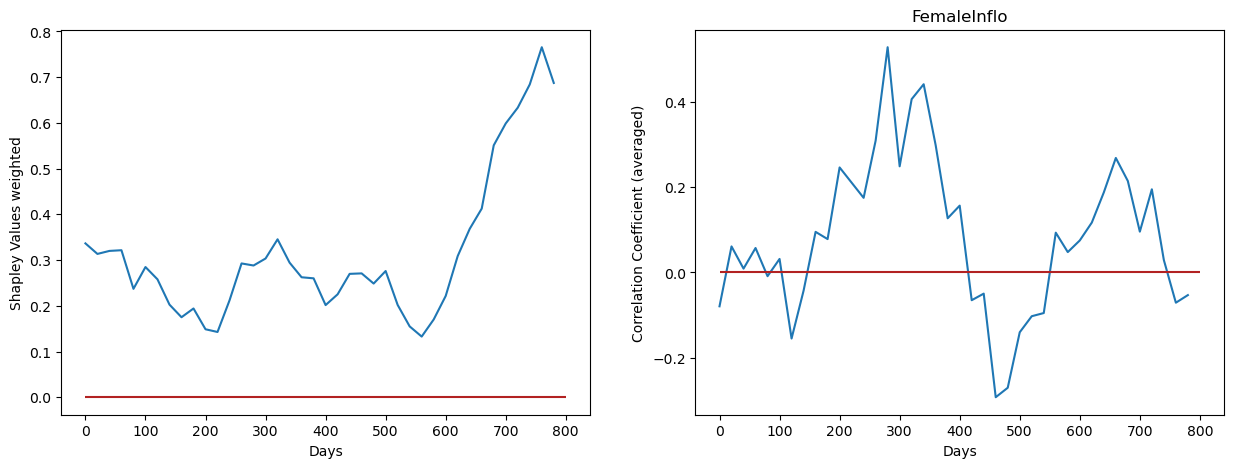

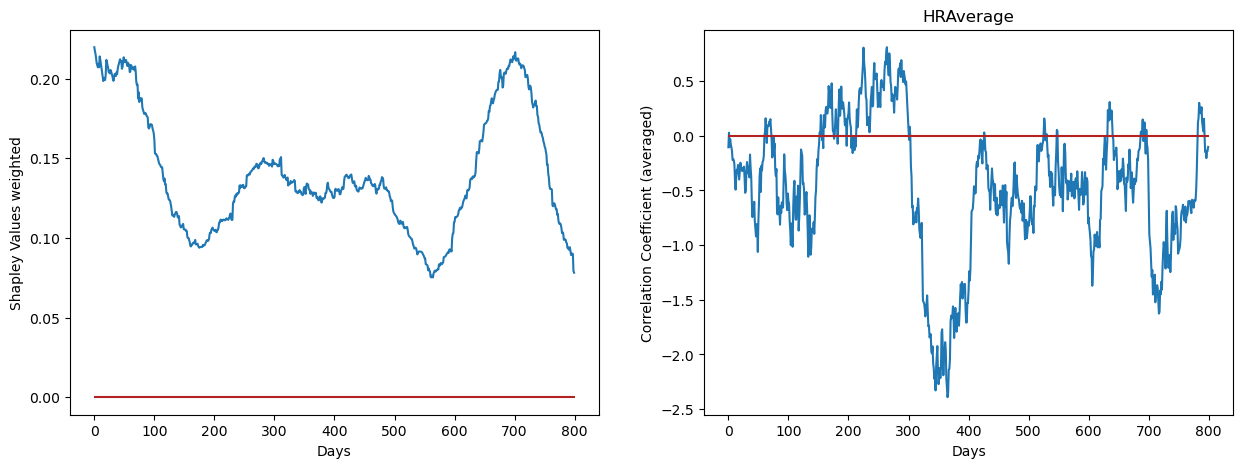

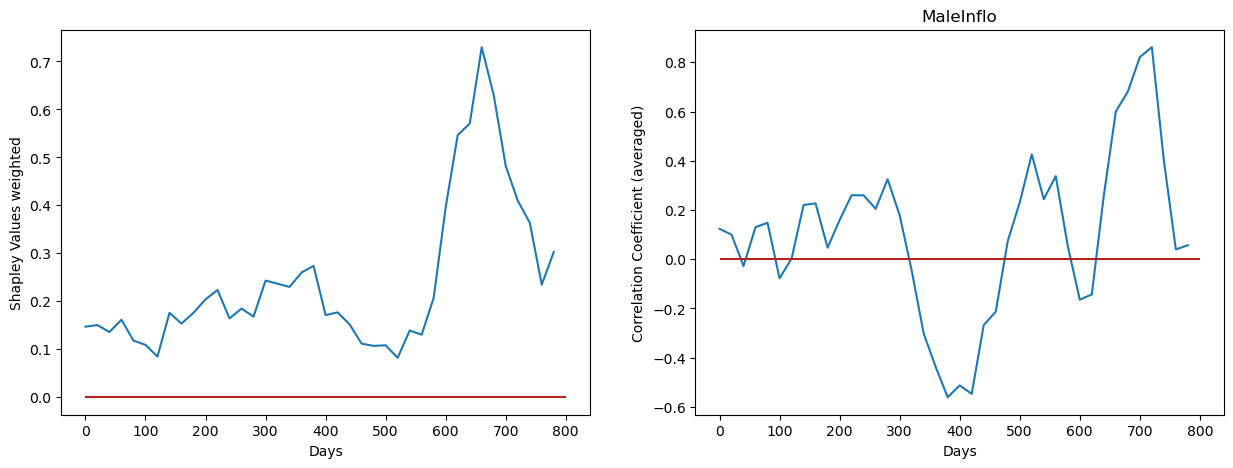

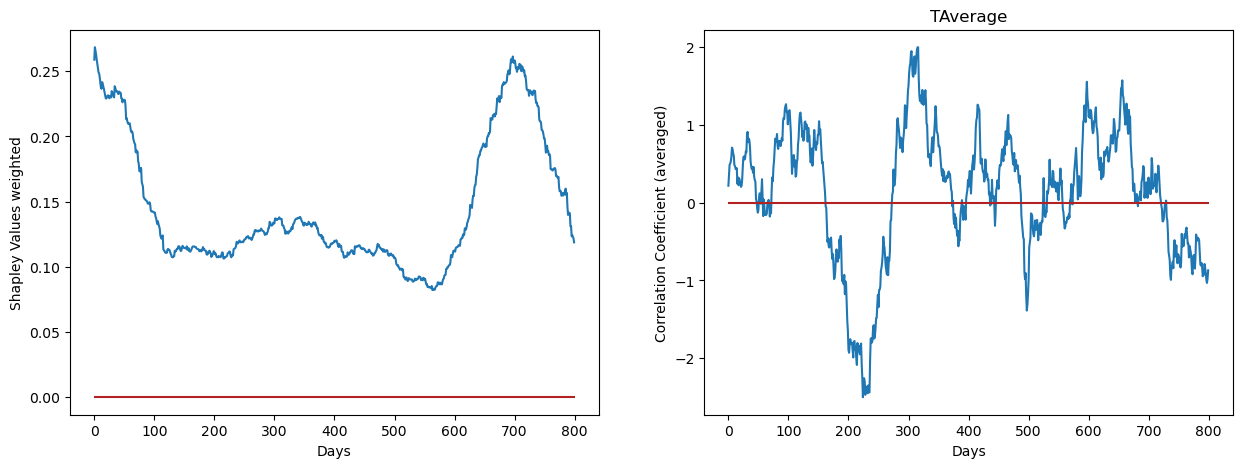

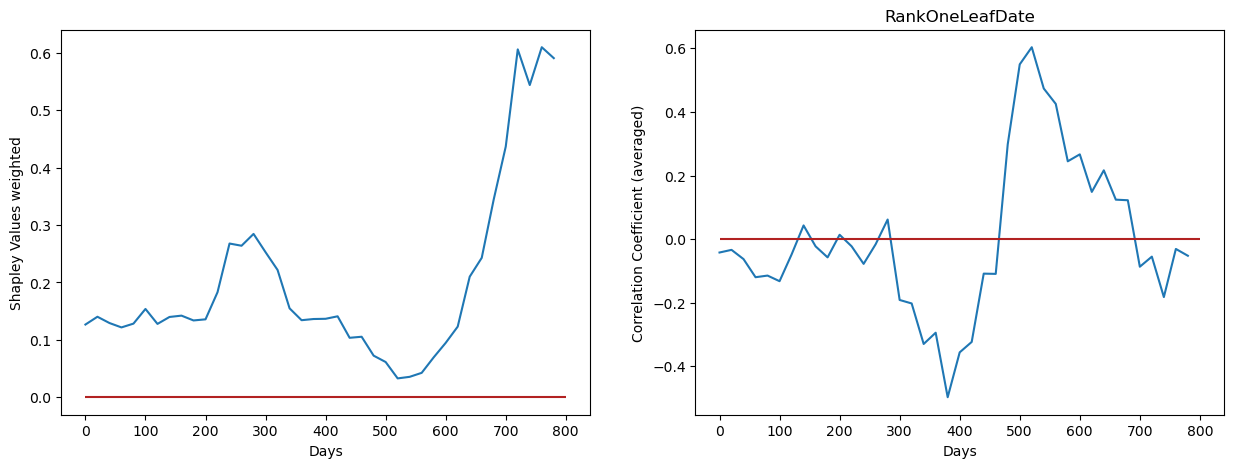

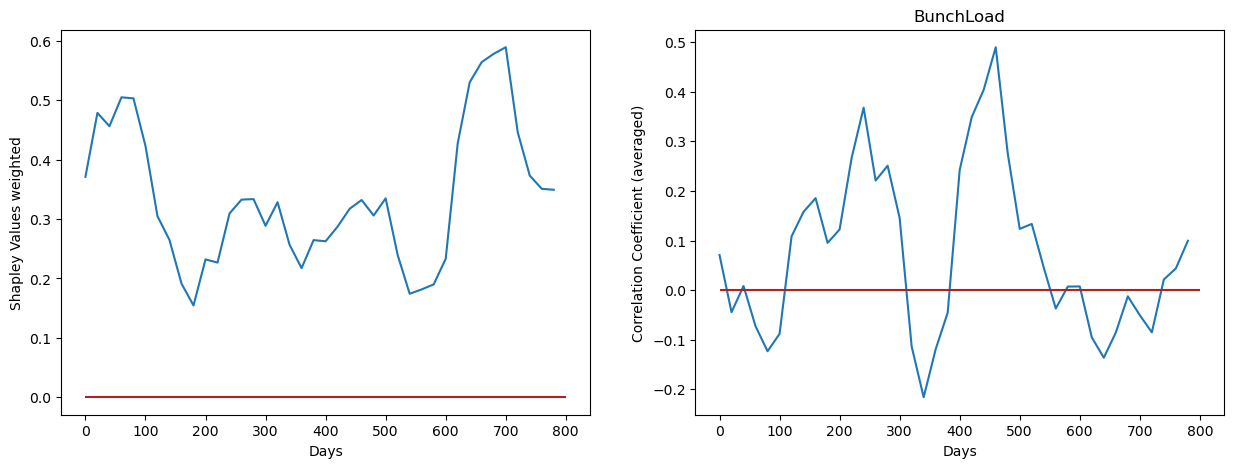

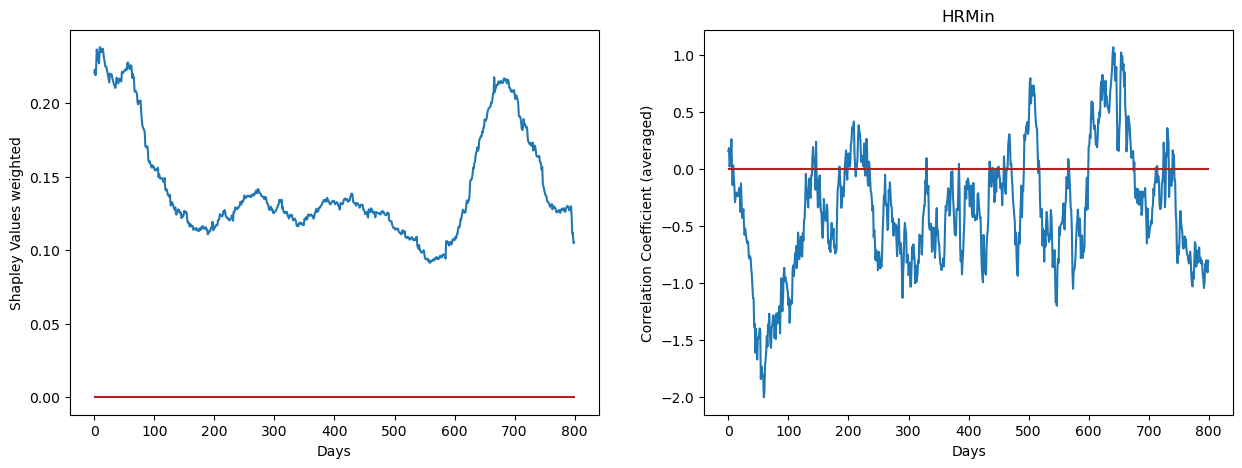

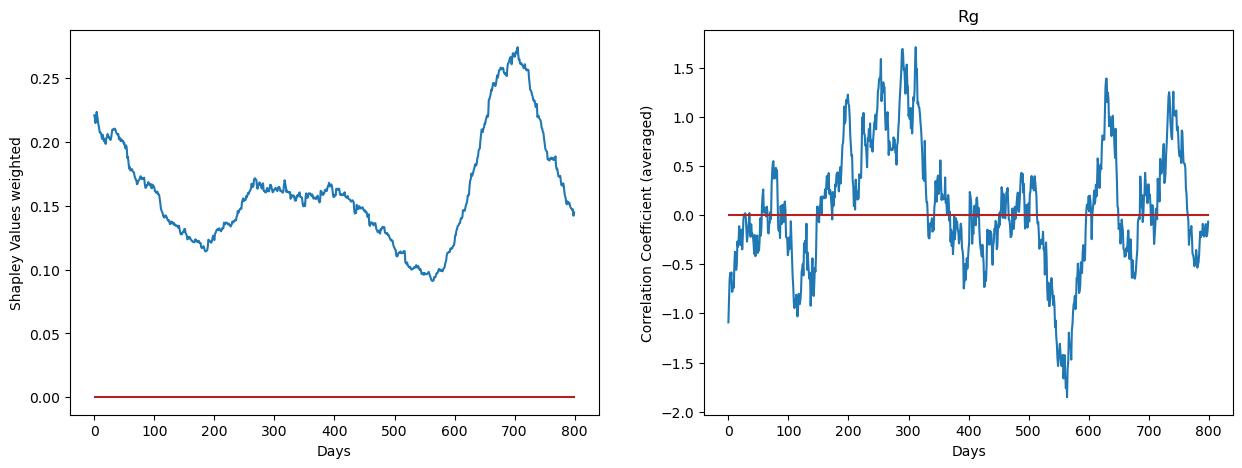

In [104]:
labels =  dict_names_ex if len(all_features_correlation_coeff) == 16 else dict_names
for id in [8, 15, 9, 12, 0, 7, 13, 18]: #: [12, 9, 0, 10, 15, 4, 5, 14]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    f = all_features_correlation_coeff[id]
    f = np.where(np.abs(np.nan_to_num(f)) < 0.0, 0, np.nan_to_num(f))
    f_max = np.max(f)

    s = all_features_shaps[id].reshape(100,-1)
    s = np.sum(np.abs(np.array(s)),axis=0)
    s_max = np.max(s)
    s_min = np.min(s)
    s = (s-s_min)/(s_max-s_min)
    # Determine the window size
    for i1, i2 in zip([0.1],[0.01]):
        window_size_1 = int(f.shape[0]*i1)
        half_window_1 = window_size_1 // 2

        window_size_2 = int(f.shape[0]*i2)
        half_window_2 = window_size_1 // 2

        # Calculate the moving average with handling of edge effects
        moving_average_f = np.zeros_like(f)
        moving_average_s = np.zeros_like(s)

        for i in range(len(f)):
            start_idx_1 = max(0, i - half_window_1)
            end_idx_1 = min(len(f), i + half_window_1 + 1)

            start_idx_2 = max(0, i - half_window_2)
            end_idx_2 = min(len(f), i + half_window_2 + 1)

            # Weights for the moving average return to 0 at the edges
            weights = np.abs(np.linspace(-1, 1, end_idx_1 - start_idx_1))
    

            maf = float((np.sum(f[start_idx_1:end_idx_1])))#/len(np.where(f[start_idx_1:end_idx_1] != 0)[0]))
        
            mas = float((np.mean(s[start_idx_2:end_idx_2])))
            #mas = mas if maf >= 0 else mas*-1

            moving_average_f[i] = 0 if np.isnan(maf) else maf 
            moving_average_s[i] = mas

        ax1.plot(moving_average_s, label='Shapley Values weighted')
        #ax1.plot(moving_average_f)
        ax2.plot(moving_average_f, label='Correlation Coefficient')

    ax1.hlines(0,0,len(f),color='firebrick')
    ax2.hlines(0,0,len(f),color='firebrick')
    plt.title(f'{labels[id]}')
    if len(s) == 40:
        ax1.set_xticks(np.arange(0,41,5), np.arange(0,801,100))
        ax2.set_xticks(np.arange(0,41,5), np.arange(0,801,100))
    ax1.set_ylabel('Shapley Values weighted')
    ax2.set_ylabel('Correlation Coefficient (averaged)')
    ax1.set_xlabel('Days')
    ax2.set_xlabel('Days')
    plt.show()
np.save(f'/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/Shapley-Values/202406_M', moving_average_f)
